### 读取国际卖场数据，按照以下要求完成练习：

    1. 筛选商品子类是 'Storage'的 订单号、订单日期、商品门类、总额、营利 等数据；

    2. 根据订单日期分组统计总和，采样并绘制每季度的营利折线图。

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_csv(r'C:\Users\YcAllenEffy\Desktop\国际卖场.csv')
df=sh.copy()
df

,订单号,订单日期,发货日期,运输等级,顾客编号,顾客名称,顾客类型,城市,州省,国家地区,...,商品编号,商品门类,商品子类,商品名称,总额,数量,折扣,营利,运费,订单优先级
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra?,Morocco,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju?rez,Chihuahua,Mexico,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [6]:
df_storage=df[df['商品子类']=='Storage'][['订单号','订单日期','商品门类','总额','营利']]
df_storage

,订单号,订单日期,商品门类,总额,营利
0,AG-2011-2040,1/1/2011,Office Supplies,408.300,106.140
2,HU-2011-1220,1/1/2011,Office Supplies,66.120,29.640
8,AO-2011-1390,1/2/2011,Office Supplies,206.400,92.880
9,ID-2011-56493,1/2/2011,Office Supplies,162.720,68.310
23,CA-2011-1800,1/3/2011,Office Supplies,551.160,71.640
...,...,...,...,...,...
51241,ES-2014-3638865,31-12-2014,Office Supplies,289.350,75.150
51262,TZ-2014-8350,31-12-2014,Office Supplies,22.923,4.053
51271,IN-2014-75603,31-12-2014,Office Supplies,72.000,4.320
51273,MX-2014-114783,31-12-2014,Office Supplies,35.200,9.120


In [7]:
df_storage.index=pd.to_datetime(df_storage['订单日期'])
df_storage

,订单号,订单日期,商品门类,总额,营利
订单日期,,,,,
2011-01-01,AG-2011-2040,1/1/2011,Office Supplies,408.300,106.140
2011-01-01,HU-2011-1220,1/1/2011,Office Supplies,66.120,29.640
2011-01-02,AO-2011-1390,1/2/2011,Office Supplies,206.400,92.880
2011-01-02,ID-2011-56493,1/2/2011,Office Supplies,162.720,68.310
2011-01-03,CA-2011-1800,1/3/2011,Office Supplies,551.160,71.640
...,...,...,...,...,...
2014-12-31,ES-2014-3638865,31-12-2014,Office Supplies,289.350,75.150
2014-12-31,TZ-2014-8350,31-12-2014,Office Supplies,22.923,4.053
2014-12-31,IN-2014-75603,31-12-2014,Office Supplies,72.000,4.320


In [9]:
df_sto_sum=df_storage.groupby(df_storage.index).sum()

In [11]:
df_sto_sum.asfreq('1Q')

,总额,营利
订单日期,,
2011-03-31,423.2400,29.5800
2011-06-30,427.5906,-127.1194
2011-09-30,84.9600,-32.5800
2011-12-31,281.3400,11.2200
2012-03-31,915.4620,147.5820
2012-06-30,430.2880,-122.9320
2012-09-30,NaN,NaN
2012-12-31,707.8080,96.4596
2013-03-31,356.2380,-0.0420


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
#设置画图 中文字体初始化
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

D:\CODE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\CODE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


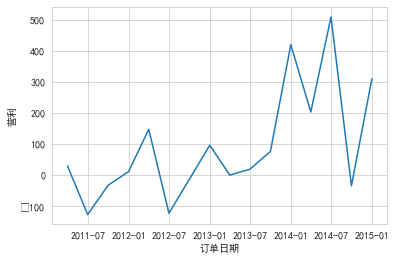

In [12]:
sns.lineplot(data=df_sto_sum.asfreq('1Q'),x=df_sto_sum.asfreq('1Q').index,y='营利')

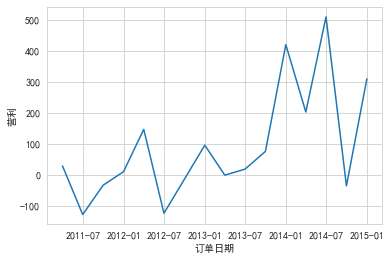

In [13]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df = sh.copy()
df_art = df[df['商品子类']=='Storage']
df_art = df_art[['订单号', '订单日期', '商品门类', '总额', '营利']]

df_sum = df_art.groupby('订单日期').sum()
df_sum.index = pd.to_datetime(df_sum.index)
df_sum = df_sum.sort_index()

df_freq = df_sum.asfreq('Q')
sns.lineplot(data=df_freq, x='订单日期', y='营利');

###  继续使用练习1的卖场数据集，按以下要求完成练习：

    1. 筛选商品门类是'Furniture'的 订单日期、商品门类、总额、营利 等数据；

    2. 采样并绘制每半年的营利折线图，采样包含右边界；

    3. 采样并绘制每100天的营利折线图，采样包含左边界。
    

In [14]:
df=sh.copy()
df_fnt=df[df['商品门类']=='Furniture'][['订单日期','商品门类','总额','营利']]
df_fnt

,订单日期,商品门类,总额,营利
4,1/1/2011,Furniture,113.670,37.7700
7,1/2/2011,Furniture,290.666,3.4196
12,1/2/2011,Furniture,309.600,148.5000
24,1/3/2011,Furniture,1314.450,341.7300
27,1/3/2011,Furniture,634.116,-172.1172
...,...,...,...,...
51242,31-12-2014,Furniture,78.120,35.9200
51246,31-12-2014,Furniture,245.160,90.6600
51249,31-12-2014,Furniture,173.760,-117.3600
51255,31-12-2014,Furniture,43.800,13.5600


In [15]:
df_fnt.index=pd.to_datetime(df_fnt['订单日期'])
df_fnt.sort_index()

,订单日期,商品门类,总额,营利
订单日期,,,,
2011-01-01,1/1/2011,Furniture,113.670,37.7700
2011-01-02,1/2/2011,Furniture,290.666,3.4196
2011-01-02,1/2/2011,Furniture,309.600,148.5000
2011-01-03,1/3/2011,Furniture,48.450,12.0900
2011-01-03,1/3/2011,Furniture,63.552,-34.9536
...,...,...,...,...
2014-12-31,31-12-2014,Furniture,323.136,12.1176
2014-12-31,31-12-2014,Furniture,78.120,35.9200
2014-12-31,31-12-2014,Furniture,245.160,90.6600


In [20]:
df_fnt_halfY=df_fnt.resample('6M',closed='right',label='right').sum()

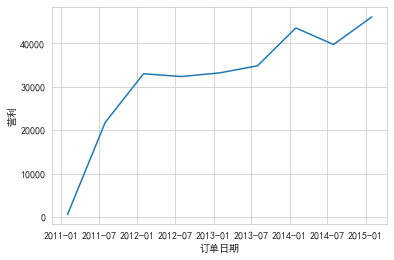

In [22]:
sns.lineplot(data=df_fnt_halfY, x=df_fnt_halfY.index, y='营利')

In [24]:
df_fnt_100d

,总额,营利
订单日期,,
2011-01-01,166845.6328,11082.0277
2011-04-11,167662.8569,11309.6019
2011-07-20,230032.6544,17811.5676
2011-10-28,251075.5292,14921.5382
2012-02-05,213604.4874,16021.2192
2012-05-15,220964.0419,22726.8423
2012-08-23,282692.6337,15007.4452
2012-12-01,232328.9993,19309.0862
2013-03-11,278022.1519,16334.3327


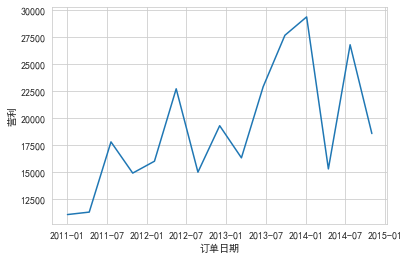

In [23]:
df_fnt_100d=df_fnt.resample('100d',closed='left',label='left').sum()
sns.lineplot(data=df_fnt_100d, x=df_fnt_100d.index, y='营利')

,总额,营利
订单日期,,
2011-01-31,46819.4040,575.2815
2011-07-31,302357.7135,21798.0282
2012-01-31,458946.5786,33005.9302
2012-07-31,387725.1620,32366.8609
2013-01-31,496764.5824,33210.4871
2013-07-31,465370.1805,34840.3293
2014-01-31,655815.9946,43558.4507
2014-07-31,603191.0983,39743.5109
2015-01-31,693883.4724,46105.8450


,总额,营利
订单日期,,
2011-01-01,166845.6328,11082.0277
2011-04-11,167662.8569,11309.6019
2011-07-20,230032.6544,17811.5676
2011-10-28,251075.5292,14921.5382
2012-02-05,213604.4874,16021.2192
2012-05-15,220964.0419,22726.8423
2012-08-23,282692.6337,15007.4452
2012-12-01,232328.9993,19309.0862
2013-03-11,278022.1519,16334.3327


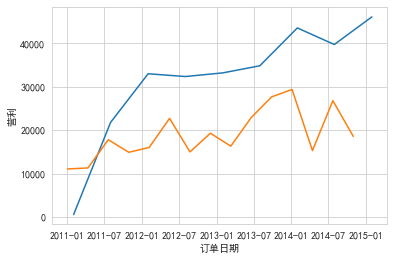

In [25]:
# 标准答案
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df = sh.copy()
df_fur = df[df['商品门类']=='Furniture']
df_fur = df_fur[['订单日期', '商品门类', '总额', '营利']]
df_fur['订单日期'] = pd.to_datetime(df_fur['订单日期'])
df_fur.index = df_fur['订单日期']

df_m = df_fur.resample('6M', closed='right').sum()
display(df_m)
sns.lineplot(data=df_m, x=df_m.index, y='营利');

df_m = df_fur.resample('100D', closed='left').sum()
display(df_m)
sns.lineplot(data=df_m, x=df_m.index, y='营利');